In [21]:
import os

In [22]:
os.getcwd()

'/home/jale/Documents/hydra'

In [23]:
import pandas, numpy
from runners.novelty_experiment_runner_sb import NoveltyExperimentRunnerSB
from os import path
import settings
from runners import constants
import seaborn as sns
import matplotlib.pyplot as plt

# Novelty experiment 

In [24]:
results_file_2 = open(path.join(settings.ROOT_PATH, "runners", "experiments", "ScienceBirds", "SB_experiment", "novelty_results_2021_6_9.csv"), "r")
# results_file_2 = open(path.join(settings.ROOT_PATH, "runners", "experiments", "ScienceBirds", "SB_experiment", "test_novelty_results.csv"), "r")
dataframe2 = NoveltyExperimentRunnerSB.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_2))


In [25]:
results_file_3 = open(path.join(settings.ROOT_PATH, "runners", "experiments", "ScienceBirds", "SB_experiment", "baseline_performance.csv"), "r")
# results_file_3 = open(path.join(settings.ROOT_PATH, "runners", "experiments", "ScienceBirds", "SB_experiment", "test_base_results.csv"), "r")

dataframe3 = NoveltyExperimentRunnerSB.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_3))

In [26]:
dataframe2

,episode_num,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,notify_novelty,pass,episode_type,trial_num,novelty_id,trial_type,level,predicted_novel,TN,FP,TP,FN
0,0,0,1,0,0,54240,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0
1,1,0,1,0,0,103320,False,Pass,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0
2,2,0,1,0,0,19420,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0
3,3,0,1,0,0,35090,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0
4,4,0,1,0,0,34000,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,20,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,False,0,0,0,1
596,21,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,False,0,0,0,1
597,22,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,False,0,0,0,1
598,23,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,False,0,0,0,1


In [27]:
trials,cdt = NoveltyExperimentRunnerSB.get_trials_summary(dataframe2)
print(trials)
print(cdt)

                                 FN  FP  TN  TP  performance  passed  is_CDT
trial_type novelty_id trial_num                                             
known      1_10_16    16          9   0   5  11      53462.4       6    True
           1_6_12     12          1   0   5  19      34053.2       6    True
           1_7_13     13          5   0   5  15      59996.4      12    True
           1_8_14     14          3   0   5  17      44808.0       6    True
           1_9_15     15          5   0   5  15      46884.0      14    True
           2_10_21    21          1   0   5  19      40607.2       6    True
           2_6_17     17          2   0   5  18      41564.0       6    True
           2_7_18     18          9   0   5  11      46172.8       8    True
           2_8_19     19         20   0   5   0      41615.2       5   False
           2_9_20     20         10   0   5  10      36707.6       4    True
           3_6_22     22         16   0   5   4      37022.0       9    True

In [28]:
baseline_trials, baseline_cdt = NoveltyExperimentRunnerSB.get_trials_summary(dataframe3)

print(baseline_trials)

                                 FN  FP  TN  TP  performance  passed  is_CDT
trial_type novelty_id trial_num                                             
known      1_10_16    16         20   0   5   0      56623.2       9   False
           1_6_12     12         20   0   5   0      49106.8       8   False
           1_7_13     13         20   0   5   0      57386.8       7   False
           1_8_14     14         20   0   5   0      44127.2       9   False
           1_9_15     15         20   0   5   0      46349.6      11   False
           2_10_21    21         20   0   5   0      38782.0       6   False
           2_6_17     17         20   0   5   0      57654.8      14   False
           2_7_18     18         20   0   5   0      34568.8       8   False
           2_8_19     19         20   0   5   0      46986.0      10   False
           2_9_20     20         20   0   5   0      54062.4      11   False
           3_6_22     22         20   0   5   0      12262.8       2   False

In [66]:
asymptote = 5

metrics, performance_metrics = NoveltyExperimentRunnerSB.get_program_metrics(cdt, trials, dataframe2, dataframe3, asymptote)

performance_metrics = pandas.DataFrame(columns=['M3', 'M4', 'M5', 'M6'])
grouped_trials = dataframe2[['trial_num', 'trial_type', 'episode_type', 'performance']].groupby("trial_num")
grouped_base = dataframe3[['trial_num', 'trial_type', 'episode_type', 'performance']].groupby("trial_num")

m3_agg_trials = pandas.DataFrame(columns=["index", "0", 'known_perf'])
m4_agg_trials = pandas.DataFrame(columns=["index", "0", 'unknown_perf'])
m5_agg_trials = pandas.DataFrame(columns=["episode_type", "performance", "trial_num", "trial_type"])
m6_agg_trials = pandas.DataFrame(columns=["episode_type", "performance", "trial_num", "trial_type"])
m3_agg_base = pandas.DataFrame(columns=["index", "0", 'known_perf'])
m4_agg_base = pandas.DataFrame(columns=["index", "0", 'unknown_perf'])
m5_agg_base = pandas.DataFrame(columns=["episode_type", "performance", "trial_num", "trial_type"])
m6_agg_base = pandas.DataFrame(columns=["episode_type", "performance", "trial_num", "trial_type"])

trials_known_avg = []   # M3
trials_unknown_avg = [] # M4
trials_last = []        # M5
trials_asymptote = []   # M6
for trial_num, group in grouped_trials:
    if 'known' in group.values: # group.trial_type: # M3
        known_avg = group.groupby(["trial_type", "episode_type"]).get_group(("known", "novelty")).agg({'performance': numpy.mean})
        trials_known_avg.append(known_avg)

    if 'unknown' in group.values: # group.trial_type: # M4
        unknown_avg = group.groupby(["trial_type", "episode_type"]).get_group(("unknown", "novelty")).agg({'performance': numpy.mean})
        trials_unknown_avg.append(unknown_avg)

    # M5
    last_per_group = group.groupby("episode_type").get_group("novelty").agg({'performance': numpy.sum})
    trials_last.append(last_per_group)

    # M6
    novelty_grouped = group.groupby("episode_type").get_group("novelty")
    slice = asymptote if len(novelty_grouped.index) > asymptote else len(novelty_grouped.index)
    post_asymptote = novelty_grouped.tail(slice).agg({"performance": numpy.sum})
    trials_asymptote.append(post_asymptote)

if len(trials_known_avg) > 0:
    m3_agg_trials = pandas.concat(trials_known_avg, sort=True).reset_index()
if len(trials_unknown_avg) > 0:
    m4_agg_trials = pandas.concat(trials_unknown_avg, sort=True).reset_index()
if len(trials_last) > 0:
    m5_agg_trials = pandas.concat(trials_last, sort=True).reset_index()
if len(trials_asymptote) > 0:
    m6_agg_trials = pandas.concat(trials_asymptote, sort=True).reset_index()

base_known_avg = []     # M3
base_unknown_avg = []   # M4
base_last = []          # M5
base_asymptote = []     # M6
for trial_num, group in grouped_base:
    if 'known' in group.values: # group.trial_type:    # M3
        known_avg = group.groupby(["trial_type", "episode_type"]).get_group(("known", "non-novelty-performance")).agg({'performance': numpy.mean})
        base_known_avg.append(known_avg)

    if 'unknown' in group.values: # group.trial_type:    # M4
        unknown_avg = group.groupby(["trial_type", "episode_type"]).get_group(("unknown", "non-novelty-performance")).agg({'performance': numpy.mean})
        base_unknown_avg.append(unknown_avg)

    # M5
    last_per_group = group.groupby("episode_type").get_group("novelty").agg({'performance': numpy.sum})
    base_last.append(last_per_group)

    # M6
    novelty_grouped = group.groupby("episode_type").get_group("novelty")
    slice = asymptote if len(novelty_grouped.index) > asymptote else len(novelty_grouped.index)
    post_asymptote = novelty_grouped.tail(slice).agg({"performance": numpy.sum})
    base_asymptote.append(post_asymptote)

if len(base_known_avg) > 0:
    m3_agg_base = pandas.concat(base_known_avg, sort=True).reset_index()
if len(base_unknown_avg) > 0:
    m4_agg_base = pandas.concat(base_unknown_avg, sort=True).reset_index()
if len(base_last) > 0:
    m5_agg_base = pandas.concat(base_last, sort=True).reset_index()
if len(base_asymptote) > 0:
    m6_agg_base = pandas.concat(base_asymptote, sort=True).reset_index()

# print("m3 trial: {} m3 base: {}".format(m3_agg_trials.empty, m3_agg_base.empty))
# print("m4 trial: {} m4 base: {}".format(m4_agg_trials.empty, m4_agg_base.empty))
# print("m5 trial: {} m5 base: {}".format(m5_agg_trials.empty, m5_agg_base.empty))
# print("m6 trial: {} m6 base: {}".format(m6_agg_trials.empty, m6_agg_base.empty))

if not m3_agg_trials.empty and not m3_agg_base.empty:
    m3_agg_trials['known_perf'] = m3_agg_trials[0] / m3_agg_base[0]
    performance_metrics['M3'] = m3_agg_trials.agg({'known_perf': numpy.mean})
if not m4_agg_trials.empty and not m4_agg_trials.empty:
    m4_agg_trials['unknown_perf'] = m4_agg_trials[0] / m4_agg_base[0]
    performance_metrics['M4'] = m4_agg_trials.agg({'unknown_perf': numpy.mean})['unknown_perf']
if not m5_agg_trials.empty and not m5_agg_base.empty:
    m5_agg_trials['opti_t'] = m5_agg_trials[0] / (m5_agg_base[0] + m5_agg_trials[0])
    performance_metrics['M5'] = m5_agg_trials.agg({'opti_t': numpy.sum})[0] / len(m5_agg_trials.index)
if not m6_agg_trials.empty and not m6_agg_base.empty:
    m6_agg_trials['asymptote'] = m6_agg_trials[0] / m6_agg_base[0].replace({0: numpy.nan})
    performance_metrics['M6'] = m6_agg_trials.agg({'asymptote': lambda x: x.sum(skipna=True)})['asymptote'] / len(m6_agg_trials.index)

print(metrics)

print("------------------------------------------------------------")

print(performance_metrics)

opti_t    11.585545
dtype: float64
             M1  CDT_count        M2      M2.1
trial_type                                    
known       6.1         10  0.833333       NaN
unknown     6.0          7  0.583333  0.166667
------------------------------------------------------------
                  M3        M4        M5        M6
known_perf  1.037763  0.978537  0.482731  0.746131


# Experiment Results - Pass / No Pass performance of Agent

Text(0, 0.5, 'passed episodes')

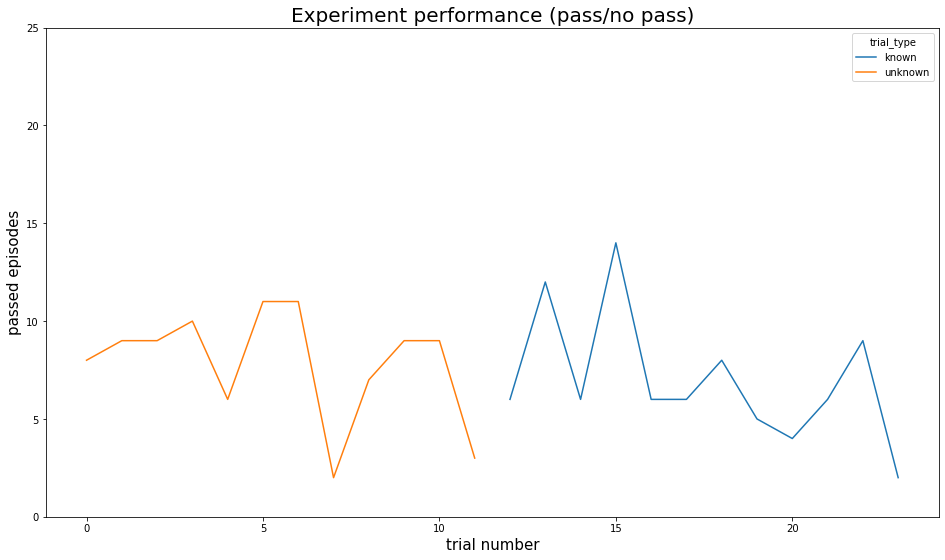

In [30]:
plt.figure(figsize=(16, 9))
ax = sns.lineplot(data=trials, y='passed', x='trial_num', hue='trial_type')
ax.set(ylim=(0, 25))
plt.title("Experiment performance (pass/no pass)", fontsize=20)
plt.xlabel("trial number", fontsize=15)
plt.ylabel("passed episodes", fontsize=15)

# Experiment Results - Rewards

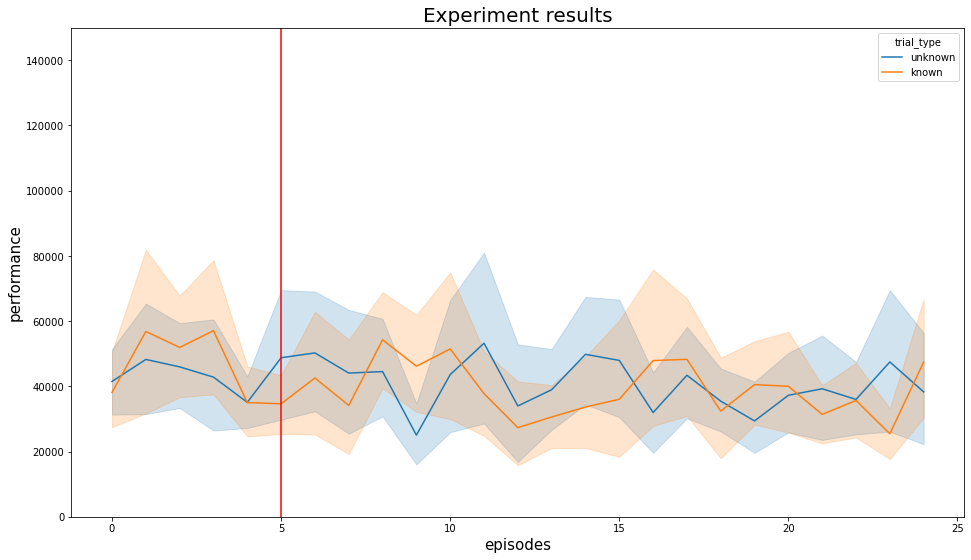

In [31]:
NoveltyExperimentRunnerSB.plot_experiment_results(dataframe2, 5)

# Science Birds Baseline Performance

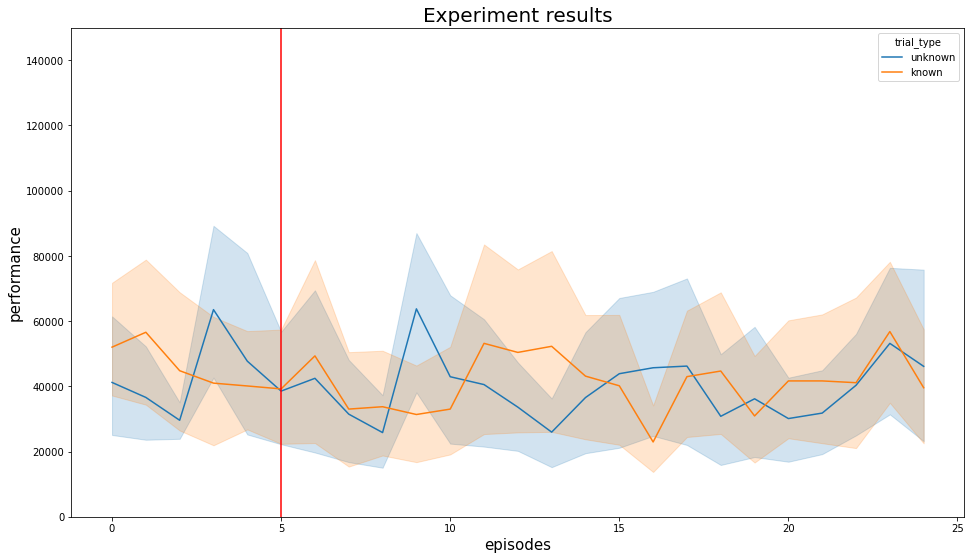

In [32]:
NoveltyExperimentRunnerSB.plot_experiment_results(dataframe3, 5)

# Level 2 Type 8 Experiment - Non repairing Hydra agent

In [33]:
results_file_4 = open(path.join(settings.ROOT_PATH, "runners", "experiments", "ScienceBirds", "SB_experiment", "level2_type8_novelties.csv"), "r")

dataframe4 = NoveltyExperimentRunnerSB.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_4))

In [34]:
dataframe4

,episode_num,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,notify_novelty,pass,episode_type,trial_num,novelty_id,trial_type,level,num_repairs,repair_time,predicted_novel,TN,FP,TP,FN
0,0,0,1,0,0,66490,False,Pass,non-novelty-performance,0,2_8_0,non_repair_unknown,2,0,0,False,1,0,0,0
1,1,0,1,0,0,31450,False,Pass,non-novelty-performance,0,2_8_0,non_repair_unknown,2,0,0,False,1,0,0,0
2,2,0,1,0,0,121670,False,Pass,non-novelty-performance,0,2_8_0,non_repair_unknown,2,0,0,False,1,0,0,0
3,3,0,1,0,0,30430,False,Fail,non-novelty-performance,0,2_8_0,non_repair_unknown,2,0,0,False,1,0,0,0
4,4,0,1,0,0,59440,False,Pass,non-novelty-performance,0,2_8_0,non_repair_unknown,2,0,0,False,1,0,0,0
5,5,0,1,0,0,21940,False,Fail,novelty,0,2_8_0,non_repair_unknown,2,0,0,False,0,0,0,1
6,6,0,1,0,0,34130,False,Fail,novelty,0,2_8_0,non_repair_unknown,2,0,0,False,0,0,0,1
7,7,0,1,0,0,10600,False,Fail,novelty,0,2_8_0,non_repair_unknown,2,0,0,False,0,0,0,1
8,8,0,1,0,0,25420,False,Fail,novelty,0,2_8_0,non_repair_unknown,2,0,0,False,0,0,0,1
9,9,0,1,0,0,11490,False,Pass,novelty,0,2_8_0,non_repair_unknown,2,0,0,False,0,0,0,1


In [35]:
trials4, cdt4 = NoveltyExperimentRunnerSB.get_trials_summary(dataframe4)
print(trials4)
print(cdt4)

                                         FN  FP  TN  TP  performance  passed  \
trial_type         novelty_id trial_num                                        
non_repair_known   2_8_1      1          20   0   5   0      43089.6       7   
non_repair_unknown 2_8_0      0          20   0   5   0      40836.4       9   

                                         is_CDT  
trial_type         novelty_id trial_num          
non_repair_known   2_8_1      1           False  
non_repair_unknown 2_8_0      0           False  
Empty DataFrame
Columns: [FN, FP, TN, TP, performance, passed, is_CDT]
Index: []
/home/jale/Documents/hydra/runners/novelty_experiment_runner_sb.py:331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['passed'] = numpy.where(trial

In [36]:
metrics4 = NoveltyExperimentRunnerSB.get_program_metrics(cdt4, trials4, dataframe4, dataframe3)

print(metrics4)

(                    M1  CDT_count  M2  M2.1
trial_type                                 
non_repair_known   NaN        NaN NaN   NaN
non_repair_unknown NaN        NaN NaN   NaN, Empty DataFrame
Columns: [M3, M4, M5, M6]
Index: [])


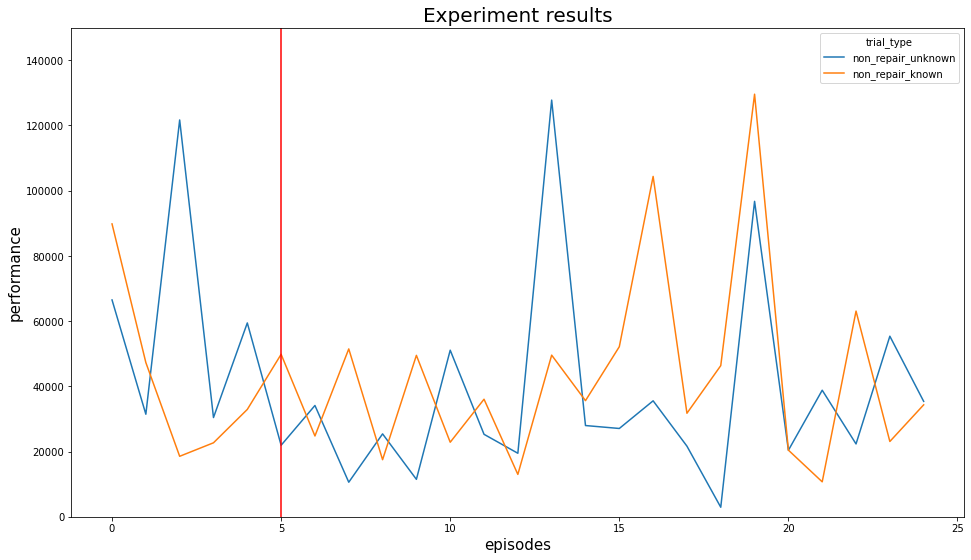

In [37]:
NoveltyExperimentRunnerSB.plot_experiment_results(dataframe4, 5)

In [38]:
compound = pandas.concat([dataframe2, dataframe4])
compound

,episode_num,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,notify_novelty,pass,episode_type,trial_num,novelty_id,trial_type,level,predicted_novel,TN,FP,TP,FN,num_repairs,repair_time
0,0,0,1,0,0,54240,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0,NaN,NaN
1,1,0,1,0,0,103320,False,Pass,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0,NaN,NaN
2,2,0,1,0,0,19420,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0,NaN,NaN
3,3,0,1,0,0,35090,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0,NaN,NaN
4,4,0,1,0,0,34000,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,False,1,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,20,0,1,0,0,20440,False,Fail,novelty,1,2_8_1,non_repair_known,2,False,0,0,0,1,0.0,0.0
46,21,0,1,0,0,10720,False,Fail,novelty,1,2_8_1,non_repair_known,2,False,0,0,0,1,0.0,0.0
47,22,0,1,0,0,63070,False,Fail,novelty,1,2_8_1,non_repair_known,2,False,0,0,0,1,0.0,0.0
48,23,0,1,0,0,23090,False,Fail,novelty,1,2_8_1,non_repair_known,2,False,0,0,0,1,0.0,0.0


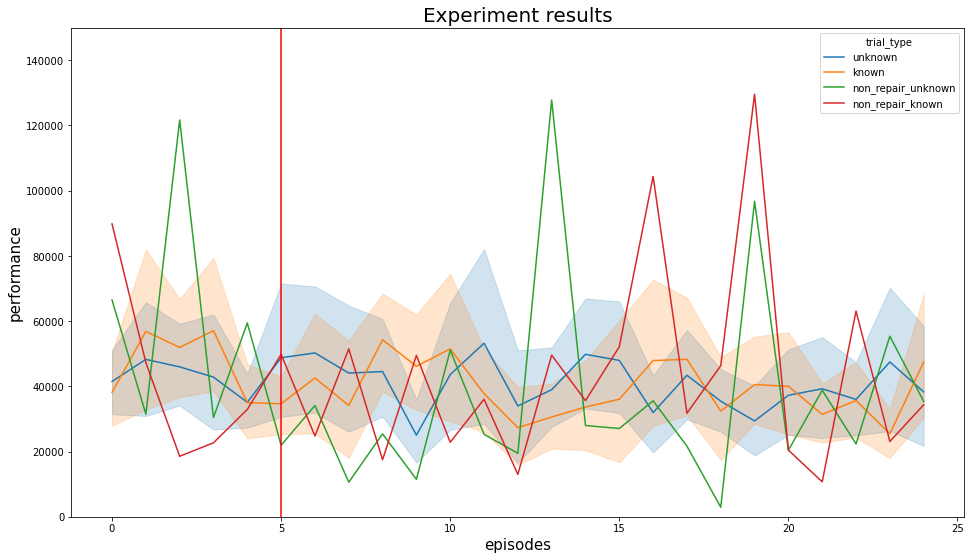

In [39]:
NoveltyExperimentRunnerSB.plot_experiment_results(compound, 5)